In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import datetime
import yfinance as yf

In [10]:
start = '2000-01-01'
end = datetime.today().strftime('%Y-%m-%d')

# for creating the model lets just use the apple stock
df = yf.download('AAPL', start, end)
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2025-01-07,242.210007,242.210007,245.550003,241.350006,242.979996,40856000
2025-01-08,242.699997,242.699997,243.710007,240.050003,241.919998,37628900
2025-01-10,236.850006,236.850006,240.160004,233.000000,240.009995,61710900
2025-01-13,234.399994,234.399994,234.669998,229.720001,233.529999,49630700
2025-01-14,233.279999,233.279999,236.119995,232.470001,234.750000,39387100


In [11]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.843077,0.999442,1.004464,0.907924,0.936384,535796800
1,2000-01-04,0.771997,0.915179,0.987723,0.903460,0.966518,512377600
2,2000-01-05,0.783294,0.928571,0.987165,0.919643,0.926339,778321600
3,2000-01-06,0.715509,0.848214,0.955357,0.848214,0.947545,767972800
4,2000-01-07,0.749401,0.888393,0.901786,0.852679,0.861607,460734400


In [12]:
df = df.drop(['Date','Adj Close'], axis=1)

<ipython-input-12-40dd4858ec8d>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Adj Close'], axis=1)


In [13]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.999442,1.004464,0.907924,0.936384,535796800
1,0.915179,0.987723,0.903460,0.966518,512377600
2,0.928571,0.987165,0.919643,0.926339,778321600
3,0.848214,0.955357,0.848214,0.947545,767972800
4,0.888393,0.901786,0.852679,0.861607,460734400


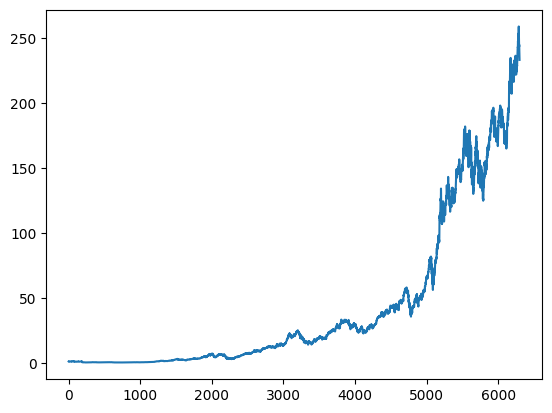

In [14]:
plt.plot(df.Close)

In [15]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6292,232.5429
6293,232.7227
6294,232.8307
6295,232.9158


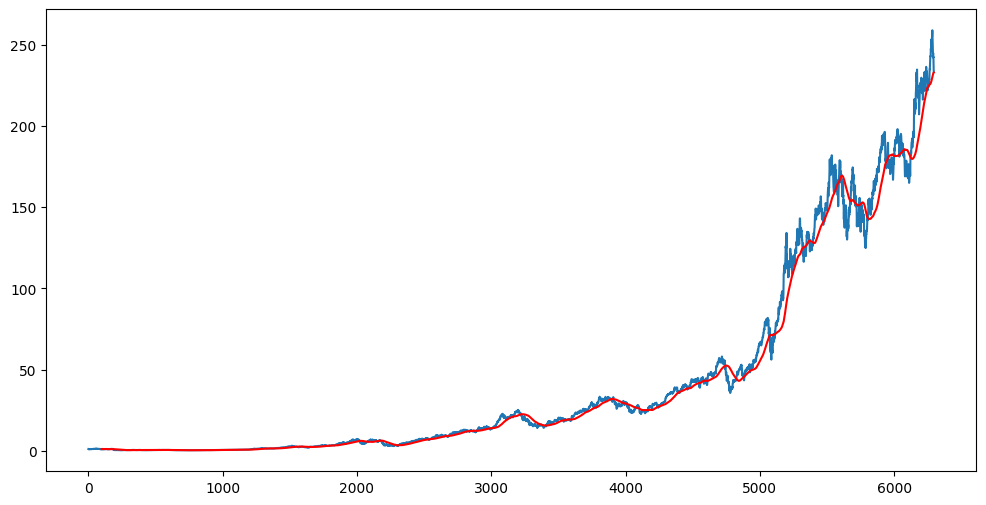

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [17]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6292,214.78145
6293,215.13355
6294,215.46355
6295,215.78700


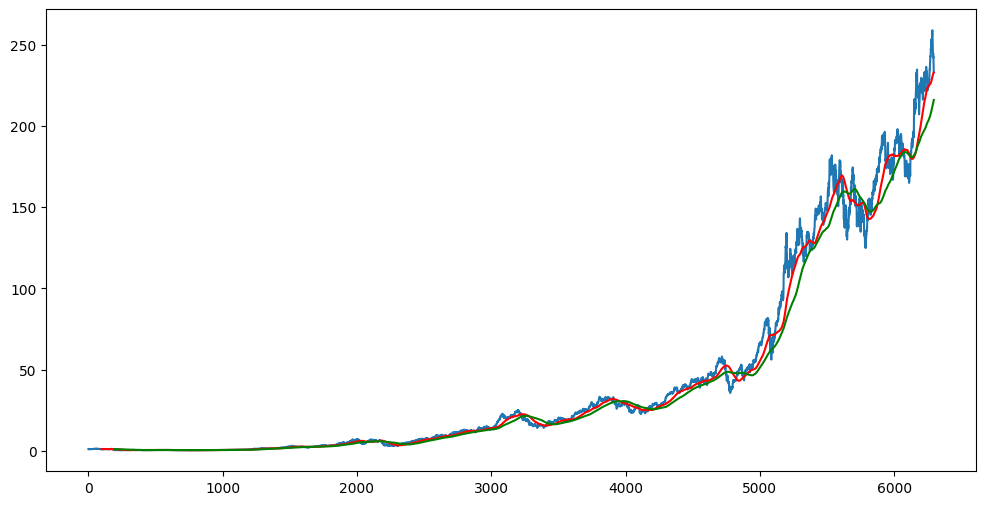

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [19]:
df.shape

(6297, 5)

In [22]:
# splitting data into training and testing on Close column
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4407, 1)
(1890, 1)


In [23]:
data_training.head()

Ticker,AAPL
0,0.999442
1,0.915179
2,0.928571
3,0.848214
4,0.888393


In [24]:
data_testing.head()

Ticker,AAPL
4407,36.382500
4408,36.435001
4409,36.942501
4410,37.259998
4411,37.389999


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01972524],
       [0.01755299],
       [0.01789823],
       ...,
       [0.91383241],
       [0.92317741],
       [0.9288489 ]])

In [28]:
data_training_array.shape

(4407, 1)

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape

(4307, 100, 1)

In [30]:
#ML Model

In [31]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) # x_train.shape[1] = 100
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) # x_train.shape[1] = 100
model.add(Dropout(0.5))

model.add(Dense(units = 1)) # prediction of the next closing value

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 298ms/step - loss: 0.0321
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - loss: 0.0040
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 298ms/step - loss: 0.0041
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 307ms/step - loss: 0.0039
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 296ms/step - loss: 0.0030
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - loss: 0.0030
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 80s 292ms/step - loss: 0.0030
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 298ms/step - loss: 0.0025
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - loss: 0.0028
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - loss: 0.0028
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 310ms/step - loss: 0.0025
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - loss: 0.0028
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 83s 314ms/step - loss: 0.0023
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 304ms/step - loss: 0.0022
Epoch 15/50
135

In [37]:
model.save('keras_model.h5')

In [38]:
data_testing.head()

Ticker,AAPL
4407,36.382500
4408,36.435001
4409,36.942501
4410,37.259998
4411,37.389999


In [39]:
past_100_days = data_training.tail(100)

In [41]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [42]:
final_df.head()

Ticker,AAPL
0,33.877499
1,33.837502
2,33.930000
3,34.174999
4,34.277500


In [43]:
input_data = scaler.fit_transform(final_df)

In [44]:
input_data

array([[1.77620832e-04],
       [0.00000000e+00],
       [4.10772526e-04],
       ...,
       [9.01546594e-01],
       [8.90666475e-01],
       [8.85692753e-01]])

In [45]:
input_data.shape

(1990, 1)

In [46]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

In [48]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1890, 100, 1)
(1890,)


In [49]:
# Making predictions

y_predicted = model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step


In [50]:
y_predicted.shape

(1890, 1)

In [51]:
y_test

array([0.01130194, 0.01153509, 0.01378881, ..., 0.90154659, 0.89066648,
       0.88569275])

In [52]:
y_predicted

array([[0.04666558],
       [0.04644313],
       [0.0462382 ],
       ...,
       [0.87025887],
       [0.8646078 ],
       [0.85858715]], dtype=float32)

In [53]:
scaler.scale_

array([0.00444084])

In [54]:
scale_factor = 1/scaler.scale_
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

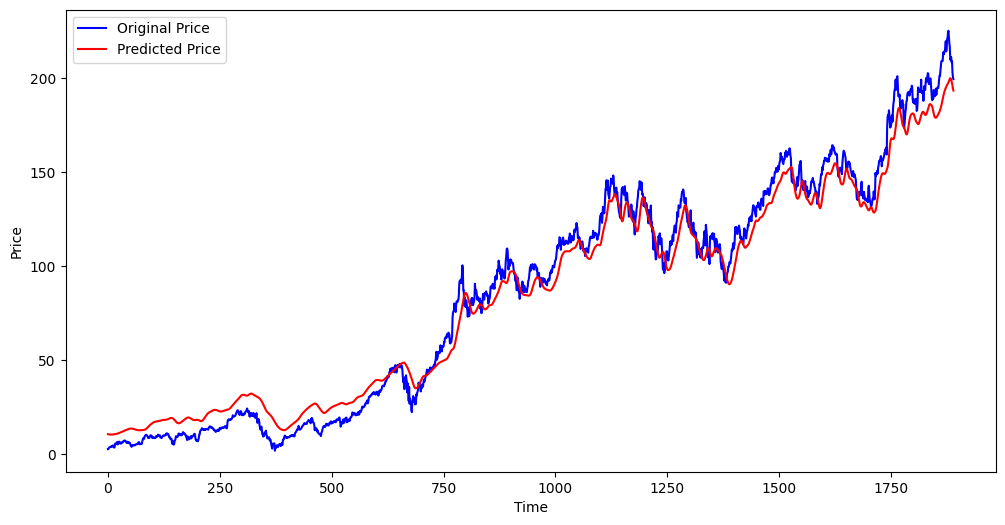

In [55]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()